#### La défuzzification COG

Pour une température de 17°C, la vitesse est estimée à : 30.57


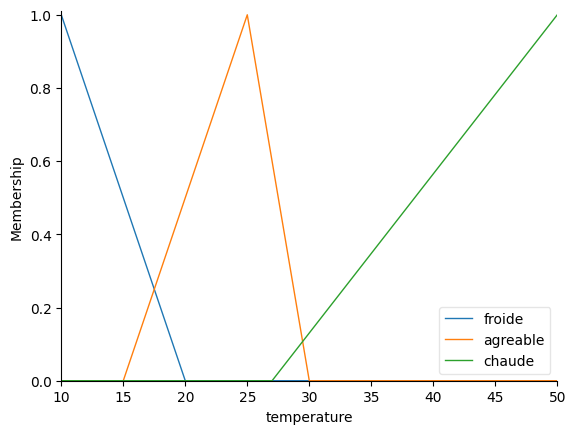

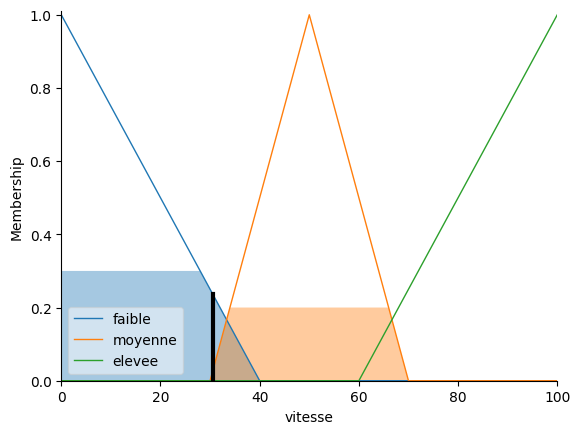

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperature = ctrl.Antecedent(np.arange(10, 51, 1), 'temperature')

vitesse = ctrl.Consequent(np.arange(0, 101, 1), 'vitesse')
vitesse.defuzzify_method = 'centroid'  

# Fonctions d'appartenance
temperature['froide'] = fuzz.trimf(temperature.universe, [10, 10, 20])
temperature['agreable'] = fuzz.trimf(temperature.universe, [15, 25, 30])
temperature['chaude'] = fuzz.trimf(temperature.universe, [27, 50, 50])

vitesse['faible']  = fuzz.trimf(vitesse.universe, [0, 0, 40])
vitesse['moyenne'] = fuzz.trimf(vitesse.universe, [30, 50, 70])
vitesse['elevee']  = fuzz.trimf(vitesse.universe, [60, 100, 100])

# Règles
rule1 = ctrl.Rule(temperature['froide'],    vitesse['faible'])
rule2 = ctrl.Rule(temperature['agreable'],  vitesse['moyenne'])
rule3 = ctrl.Rule(temperature['chaude'],    vitesse['elevee'])

# Système + simulation
vitesse_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
vitesse_sim = ctrl.ControlSystemSimulation(vitesse_ctrl)

# Entrée + calcul
vitesse_sim.input['temperature'] = 17
vitesse_sim.compute()

print(f"Pour une température de 17°C, la vitesse est estimée à : {vitesse_sim.output['vitesse']:.2f}")

# Visualisations
temperature.view()
vitesse.view(sim=vitesse_sim)

###  La méthode Sugeno/MM

 Moyenne Pondérée (MM) = 32.00


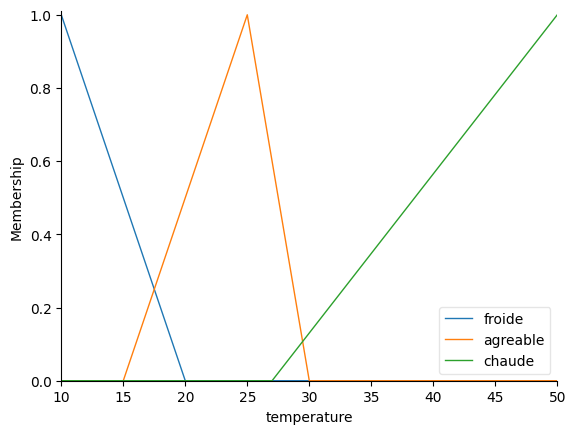

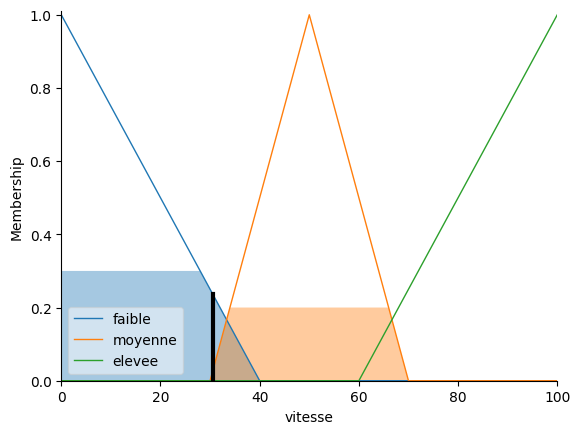

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


temperature = ctrl.Antecedent(np.arange(10, 51, 1), 'temperature')
vitesse = ctrl.Consequent(np.arange(0, 101, 1), 'vitesse')

temperature['froide']   = fuzz.trimf(temperature.universe, [10, 10, 20])
temperature['agreable'] = fuzz.trimf(temperature.universe, [15, 25, 30])
temperature['chaude']   = fuzz.trimf(temperature.universe, [27, 50, 50])

vitesse['faible']  = fuzz.trimf(vitesse.universe, [0, 0, 40])
vitesse['moyenne'] = fuzz.trimf(vitesse.universe, [30, 50, 70])
vitesse['elevee']  = fuzz.trimf(vitesse.universe, [60, 100, 100])

rule1 = ctrl.Rule(temperature['froide'],   vitesse['faible'])
rule2 = ctrl.Rule(temperature['agreable'], vitesse['moyenne'])
rule3 = ctrl.Rule(temperature['chaude'],   vitesse['elevee'])

vitesse_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
vitesse_sim = ctrl.ControlSystemSimulation(vitesse_ctrl)

vitesse_sim.input['temperature'] = 17
vitesse_sim.compute()

mu_faible = fuzz.interp_membership(temperature.universe, temperature['froide'].mf, 17)
mu_moyenne = fuzz.interp_membership(temperature.universe, temperature['agreable'].mf, 17)
mu_elevee = fuzz.interp_membership(temperature.universe, temperature['chaude'].mf, 17)


mu = np.array([mu_faible, mu_moyenne, mu_elevee])
centres = np.array([20, 50, 80])  


v_sugeno = np.sum(mu * centres) / np.sum(mu)

print(f" Moyenne Pondérée (MM) = {v_sugeno:.2f}")



temperature.view()
vitesse.view(sim=vitesse_sim)
